<div style="line-height:0.5">
<h1 style="color:#FF7C00  ">  Embeddings in Tensorflow  </h1>
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3>
    ignore CUDA warnings + tf old notations + model.compile + seaborn + Word2Vec + plt annotate
</span>
</div>

In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
""" The TF_CPP_MIN_LOG_LEVEL environment variable controls the level of TensorFlow log messages.
A value of 0 or 1 will display all log messages, while a value of 2 or higher will suppress all log messages except for errors. """

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' #to ignore CUDA warnings
import tensorflow as tf

In [4]:
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec

<h2 style="color:#FF7C00;">Example 1</h2>
<div style="margin-top: -34px;">
    <h3 style="margin-bottom: 0;">Creating embeddings manually</h3>
</div>

In [27]:
corpus = ['CPU is the brain of the computer',
        'GPU is responsible for graphics processing',
        'RAM stores data temporarily',
        'SSD is faster than HDD for storing data',
        'motherboard connects all components of the computer',
        'power supply unit provides power to the computer',
        'cooling system prevents the computer from overheating',
        'peripheral devices include keyboard, mouse, and monitor',
        'overclocking can increase the performance of the CPU and GPU',
        'virtualization allows multiple operating systems to run on one computer']

sentences = [
        "CPU processes data, GPU renders graphics.",
        "Motherboard connects components, RAM stores data.",
        "Hard drive stores files, SSD provides fast storage.",
        "Power supply delivers electricity, cooling fans prevent overheating.",
        "Graphics card enhances visuals, monitor displays output.",
        "CPU and GPU are crucial components.",
        "Motherboard, RAM, and storage are essential for a computer.",
        "Power supply and cooling fans ensure system stability.",
        "Graphics card and monitor enable high-quality visuals.",
        "CPU, GPU, RAM, and storage work together to run applications."]

texts2 = ['king is a strong man', 
        'queen is a wise woman', 
        'boy is a young man',
        'girl is a young woman',
        'prince is a young king',
        'princess is a young queen',
        'man is strong', 
        'woman is pretty',
        'prince is a boy will be king',
        'princess is a girl will be queen']

texts = [
        "The dog chased the cat up a tall tree.",
        "The curious student asked the professor a thought-provoking question during the engaging lecture.",
        "The company successfully launched a new innovative product in the competitive market.",
        "The doctor provided exceptional care and treatment to the grateful patient.",
        "The dedicated team overcame numerous challenges in the intense competition and emerged as champions.",
        "The skilled chef meticulously cooked and presented a delicious meal to the impressed guests.",
        "The talented author eloquently wrote a best-selling novel that captivated readers and became a cultural phenomenon.",
        "The visionary architect meticulously designed a modern sustainable building with unique features and environmentally-friendly materials.",
        "The talented artist skillfully painted a breathtaking portrait capturing the true essence and beauty of the elegant woman.",
        "The brilliant scientist made a groundbreaking discovery that revolutionized the scientific community and opened new possibilities for research."
]

In [28]:
def remove_stop_words(texts):
    """ Removes stop words from a list of sentences.

    Parameters:
        List of strings representing the texts to process.

    Returns:
        The list with stop words removed.
    """
    stop_words = ['is', 'a', 'will', 'be']
    processed_texts = []
    for text in texts:
        words = text.split(' ')
        for stop_word in stop_words:
            if stop_word in words:
                words.remove(stop_word)
        processed_texts.append(" ".join(words))
    
    return processed_texts

In [29]:
collection = remove_stop_words(texts)
tpye(collection), collection

In [30]:
words = []
for text in collection:
    for word in text.split(' '):
        words.append(word)

words = set(words)

In [31]:
words


{'The',
 'a',
 'and',
 'architect',
 'artist',
 'as',
 'asked',
 'author',
 'beauty',
 'became',
 'best-selling',
 'breathtaking',
 'brilliant',
 'building',
 'captivated',
 'capturing',
 'care',
 'cat',
 'challenges',
 'champions.',
 'chased',
 'chef',
 'community',
 'company',
 'competition',
 'competitive',
 'cooked',
 'cultural',
 'curious',
 'dedicated',
 'delicious',
 'designed',
 'discovery',
 'doctor',
 'dog',
 'during',
 'elegant',
 'eloquently',
 'emerged',
 'engaging',
 'environmentally-friendly',
 'essence',
 'exceptional',
 'features',
 'for',
 'grateful',
 'groundbreaking',
 'guests.',
 'impressed',
 'in',
 'innovative',
 'intense',
 'launched',
 'lecture.',
 'made',
 'market.',
 'materials.',
 'meal',
 'meticulously',
 'modern',
 'new',
 'novel',
 'numerous',
 'of',
 'opened',
 'overcame',
 'painted',
 'patient.',
 'phenomenon.',
 'portrait',
 'possibilities',
 'presented',
 'product',
 'professor',
 'provided',
 'question',
 'readers',
 'research.',
 'revolutionized',
 

In [32]:
word2int = {}

# Dictionary that maps each word in the vocabulary to a unique integer index
for i,word in enumerate(words):
    word2int[word] = i

data, sentences = [], []

# Split each sentence into a list of words and add it to a list of sentences
for sentence in collection:
    sentences.append(sentence.split())

# Window size for the skip-gram model
WINDOW_SIZE = 2

####### For each sentence, for each word in the sentence, for each neighbor word within the window size
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            # Ignore the word itself as a neighbor
            if neighbor != word:
                # Add a pair of words to the training data, consisting of the center word and one of its neighbors
                data.append([word, neighbor])

In [33]:
for text in collection:
    print(text)

df = pd.DataFrame(data, columns = ['input', 'label'])

The dog chased the cat up tall tree.
The curious student asked the professor thought-provoking question during the engaging lecture.
The company successfully launched new innovative product in the competitive market.
The doctor provided exceptional care and treatment to the grateful patient.
The dedicated team overcame numerous challenges in the intense competition and emerged as champions.
The skilled chef meticulously cooked and presented delicious meal to the impressed guests.
The talented author eloquently wrote best-selling novel that captivated readers and became a cultural phenomenon.
The visionary architect meticulously designed modern sustainable building with unique features and environmentally-friendly materials.
The talented artist skillfully painted breathtaking portrait capturing the true essence and beauty of the elegant woman.
The brilliant scientist made groundbreaking discovery that revolutionized the scientific community and opened new possibilities for research.


In [34]:
df.shape

(468, 2)

<h1 style="color:rgb(255, 124, 0); font-size:30px; font-family:georgia; text-align:left;"> Tensorflow Graph </h1>
<div style="margin-top: -18px;">
Placeholders in TensorFlow are used to feed input data and labels into the computational graph during training. <br>     
They are like empty variables that are filled with data at runtime. <br>
The x and y_label placeholders  are created to hold the input data and labels for the skip-gram model. <br>     
They represent the input and label data as one-hot encoded vector of a word from the vocabulary. <br>
<br>
By creating these placeholders, we can later feed in the input data and labels during training using a feed_dict dictionary. <br>    
The None value in the shape parameter of the placeholders means that we can feed in a variable    
number of data points at once, <br> depending on the size of our training batch.
</div>

In [36]:
ONE_HOT_DIM = len(words)

def to_one_hot_encoding(data_point_index):
    """ Convert numbers to one hot vectors. """
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = []
Y = []

### For all rows in the input and label columns, convert to a one-hot encoded vector using the word-to-index dictionary 'word2int' 
for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

## Convert to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

In [ ]:
""" Create placeholders for X_train and Y_train. """
# Old notation 
# x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
# y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# Define the shape of the input tensor
input_shape = (None, ONE_HOT_DIM)
## Create an input tensor with the specified shape
x = tf.keras.Input(shape=input_shape, dtype=tf.float32)
y_label = tf.keras.Input(shape=input_shape, dtype=tf.float32)

In [37]:
%%script echo skip since it is the old way to deal with tf
""" Old versions of tf """
# Word embedding for 2d visualization => 2 dimension 
EMBEDDING_DIM = 2 

## Create the first hidden layer (weights and bias)
W1 = tf.Variable(tf.random.normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random.normal([1])) 
# Add bias to matrix-multiplyed inputs + weights 
hidden_layer = tf.add(tf.matmul(x,W1), b1)

## Create the second hidden layer 
W2 = tf.Variable(tf.random.normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random.normal([1]))
# Compute the output of the network by matrix-multiplying the hidden layer with the weights and adding the bias, 
# followed by a softmax activation
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

skip since it is the old way to deal with tf


In [38]:
""" Correct version. How to create layers with keras 
To solve the "Warning : <tf.Variable 'Variable:0' shape=(12, 2) dtype=float32>, 
This is a strong indication that the Lambda layer should be rewritten as a subclassed Layer. "
=> Create the layers with keras! 
These variables are not being tracked by the Keras model, which can cause problems during training and inference. """

EMBEDDING_DIM = 2 

# Create the hidden layer with a dense layer
hidden_layer = tf.keras.layers.Dense(units=EMBEDDING_DIM, input_dim=ONE_HOT_DIM)(x)
# Create the output layer with a dense layer
prediction = tf.keras.layers.Dense(units=ONE_HOT_DIM, input_dim=EMBEDDING_DIM, activation='softmax')(hidden_layer)

In [39]:
%%script echo skip since it is the old way to deal with tf
""" Old version => no attribute 'Session' in tensorflow. """
## Training
sess = tf.Session()
init = tf.global_variables_initializer()
#### Run session
sess.run(init) 
iteration = 20000
for i in range(iteration):
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 3000 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

skip since it is the old way to deal with tf


In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=EMBEDDING_DIM, input_dim=ONE_HOT_DIM),
    tf.keras.layers.Dense(units=ONE_HOT_DIM, input_dim=EMBEDDING_DIM, activation='softmax')])

## Compile the model with an optimizer and a loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy')

# Train the model for a fixed number of epochs
history = model.fit(X_train, Y_train, epochs=50)

# Get the weights of the input layer
W1, b1 = model.layers[0].get_weights()

# Use the weights to get the word vectors
vectors = W1 + b1
print(vectors)

Epoch 1/50
15/15 [==============================] - 1s 2ms/step - loss: 4.6191
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 4.5724
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: 4.5236
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 4.4638
Epoch 5/50
15/15 [==============================] - 0s 2ms/step - loss: 4.3932
Epoch 6/50
15/15 [==============================] - 0s 2ms/step - loss: 4.3281
Epoch 7/50
15/15 [==============================] - 0s 2ms/step - loss: 4.2820
Epoch 8/50
15/15 [==============================] - 0s 2ms/step - loss: 4.2437
Epoch 9/50
15/15 [==============================] - 0s 2ms/step - loss: 4.2059
Epoch 10/50
15/15 [==============================] - 0s 2ms/step - loss: 4.1682
Epoch 11/50
15/15 [==============================] - 0s 2ms/step - loss: 4.1337
Epoch 12/50
15/15 [==============================] - 0s 3ms/step - loss: 4.1003
Epoch 13/50
15/15 [==============================

In [41]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = W1 + b1 
print(vectors)

[[ 1.8246987  -3.537925  ]
 [-2.8405252   1.8351188 ]
 [-0.95175964 -0.51973414]
 [ 0.09910423  1.1889229 ]
 [-1.6510923  -0.6915324 ]
 [-2.5682528  -0.5868671 ]
 [-0.53974664  1.4572691 ]
 [-2.8312304  -0.88785934]
 [ 1.2261479   2.4462209 ]
 [-1.5023344  -0.4683181 ]
 [-0.32423463  0.04318339]
 [-0.549457   -0.2479837 ]
 [ 2.0953596   1.965616  ]
 [-0.11307754  1.3147558 ]
 [ 0.23029113 -2.3411837 ]
 [ 0.31019264 -1.3090923 ]
 [-0.26226988  0.05276778]
 [ 2.5454056  -2.5176876 ]
 [-0.24974003 -1.5182306 ]
 [ 0.6352096  -2.0824637 ]
 [-0.72060996 -0.5532129 ]
 [ 0.2455594  -0.47896212]
 [ 1.7991614  -0.8441057 ]
 [ 1.8216703   0.22346842]
 [ 1.4602749  -1.1672716 ]
 [ 0.80940264 -0.65963817]
 [-1.6783681  -1.5840356 ]
 [ 1.8665745   2.146872  ]
 [-2.3616006   2.6986785 ]
 [-0.69585574 -0.35821497]
 [ 1.096992   -0.47619358]
 [-1.3640454  -1.0183    ]
 [-0.85584074 -1.8584903 ]
 [ 0.3029034  -1.1305796 ]
 [-0.9296848   0.74118733]
 [-0.05770132 -2.849078  ]
 [-2.7803335  -0.17627433]
 

### => WordVector representations, the embedding space

In [42]:
"""  Tabular x
Converting words to list from set is necessary since a sets are unordered collection of unique elements, 
but the pd.DataFrame constructor expects a sequence-like object, such as a list or a NumPy array.
""" 
words = list(words)

w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,painted,1.824699,-3.537925
1,discovery,-2.840525,1.835119
2,cat,-0.951760,-0.519734
3,became,0.099104,1.188923
4,scientific,-1.651092,-0.691532
...,...,...,...
97,phenomenon.,0.890658,2.374327
98,beauty,-1.394751,-0.828281
99,team,0.427502,-2.340866
100,chef,0.585916,-0.070599


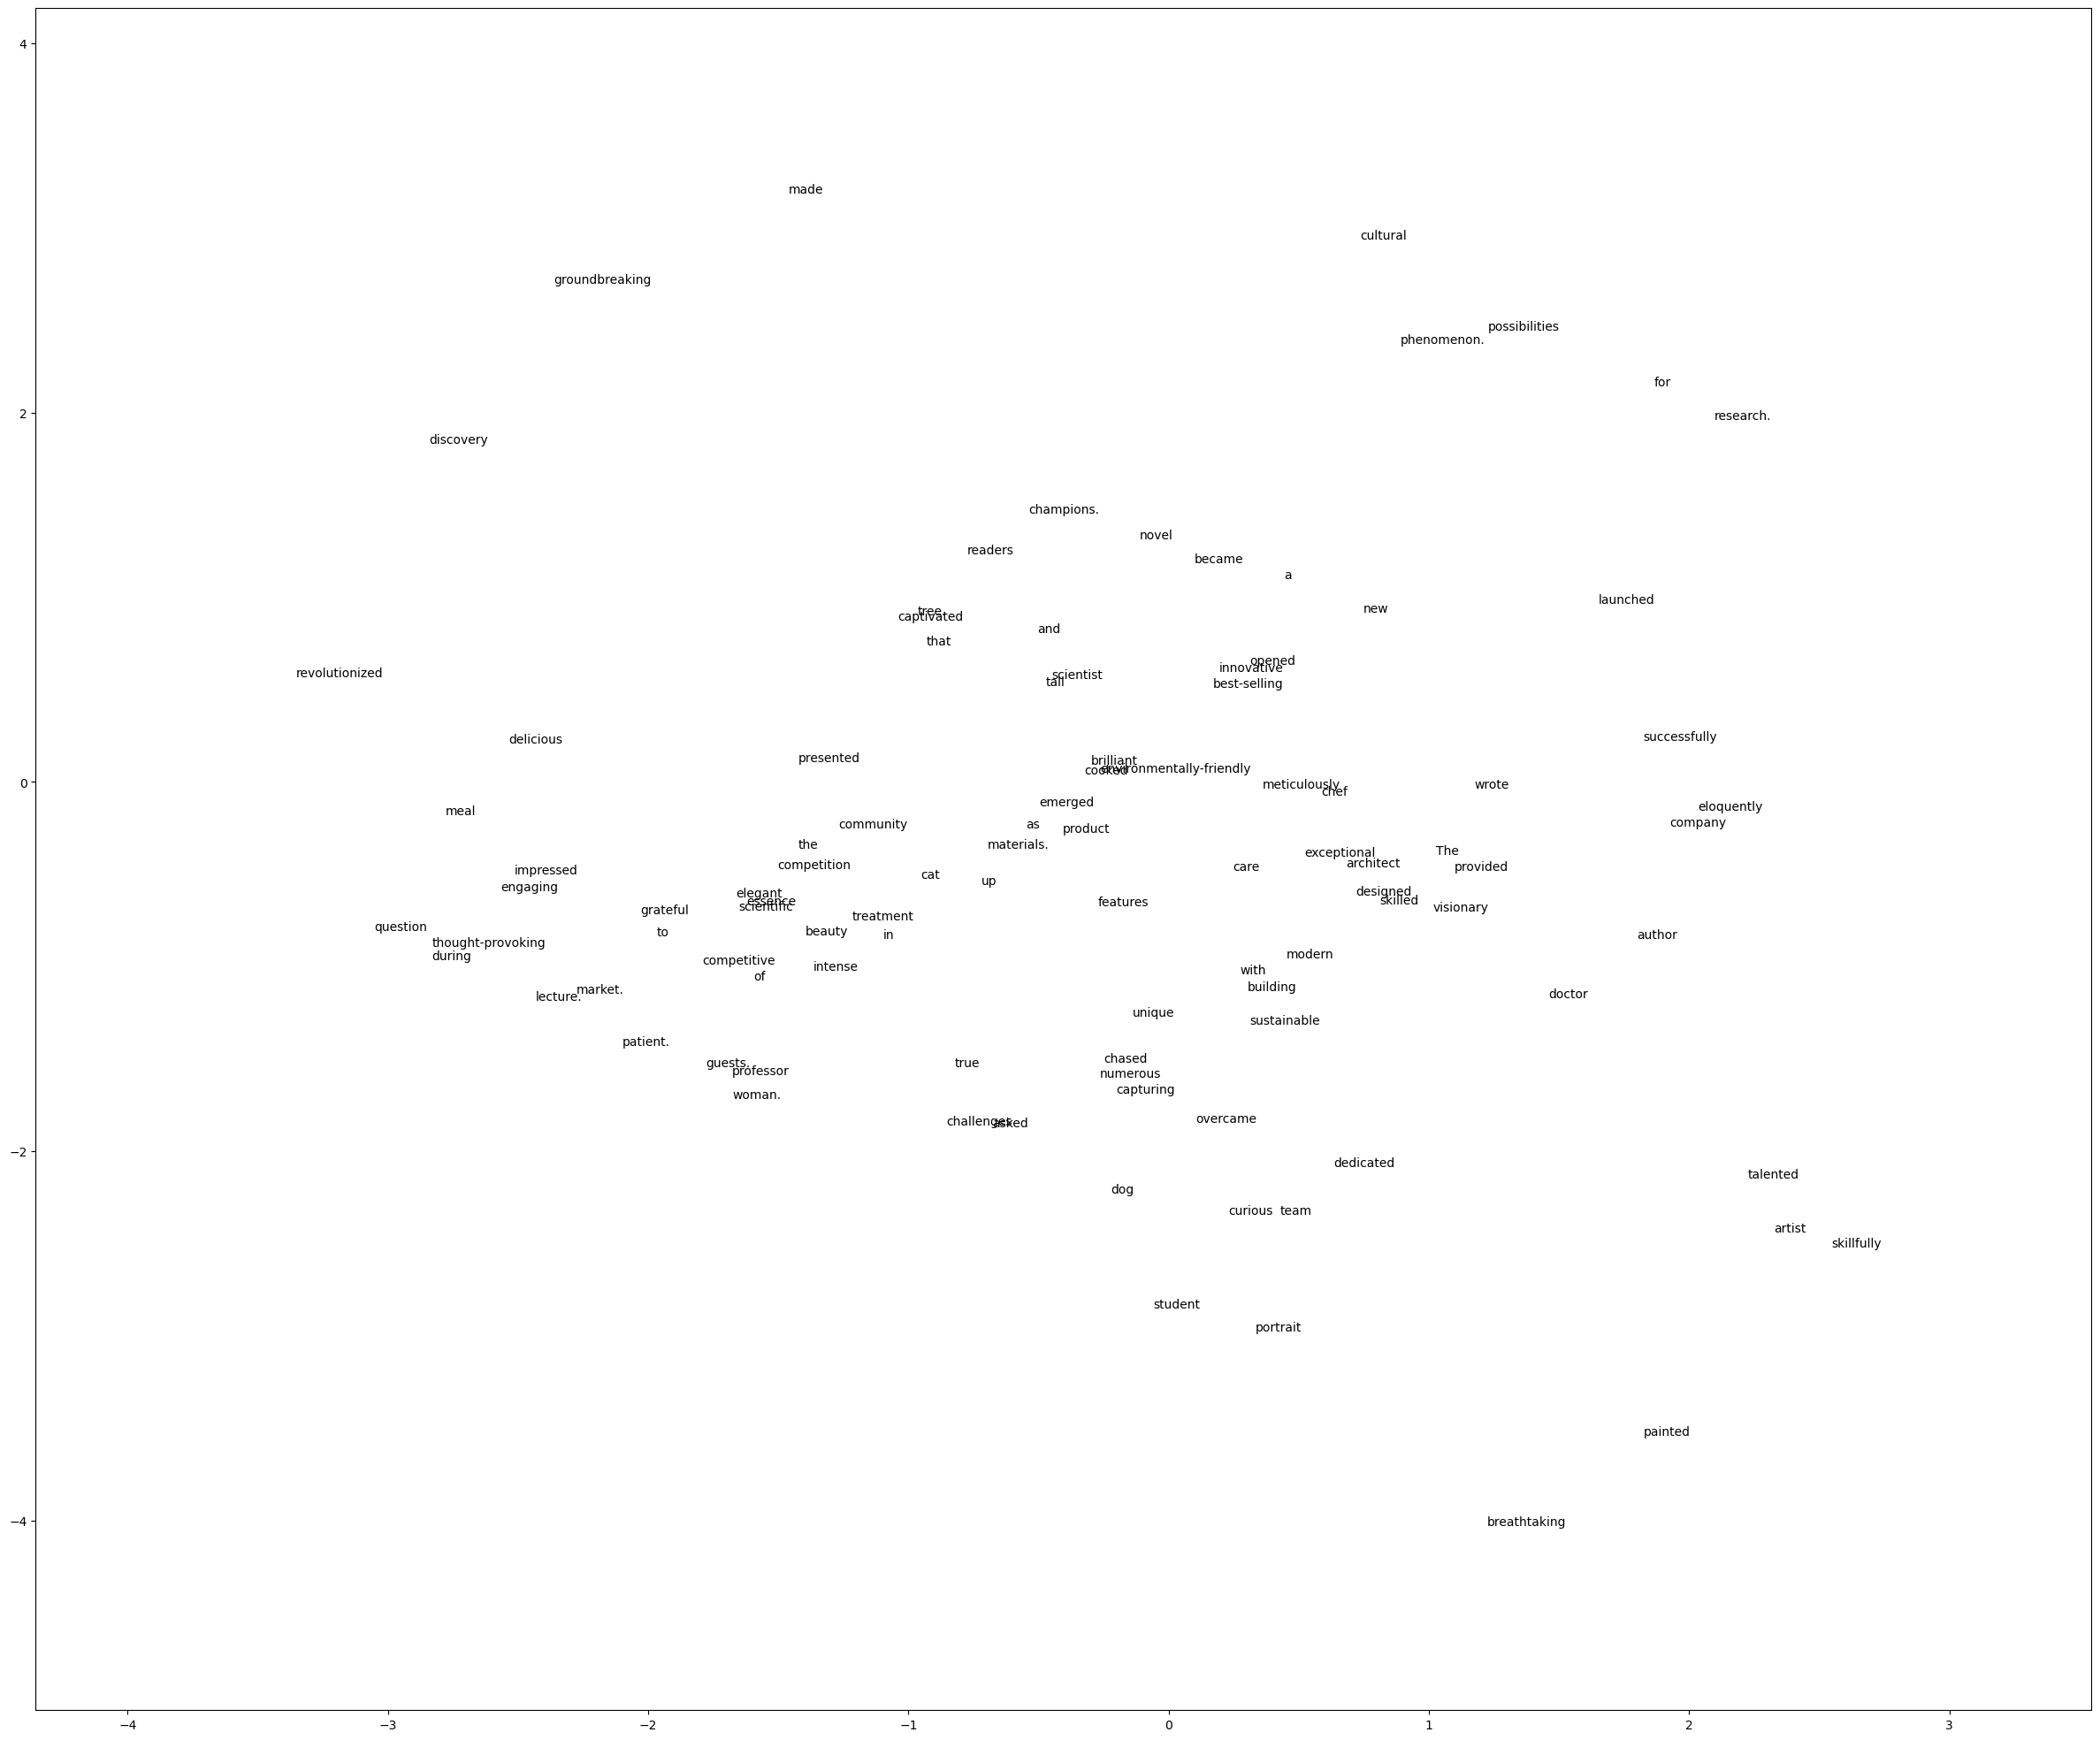

In [43]:
""" Visualize embeddings in 2D space """
fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING

plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (30,25)
plt.show()

<h2 style="color:#FF7C00;">Example 2</h2>
<div style="margin-top: -33px;">
    <h3 style="margin-bottom: 0;">Creating embeddings with Word2Vec </h3>
</div>

In [5]:
sentences = [
    "I love machine learning",
    "Word embeddings are awesome",
    "TensorFlow is a popular framework",
    "Word2Vec is a word embedding technique",
    "Deep learning is fascinating",
    "Natural language processing is a challenging field",
    "Recurrent neural networks can handle sequential data",
    "Convolutional neural networks are great for image recognition",
    "Data preprocessing is crucial for machine learning",
    "Big data analytics is revolutionizing industries",
    "Artificial intelligence is the future",
    "Machine learning models require labeled data",
    "Feature engineering improves model performance",
    "Python is a versatile programming language",
    "Neural networks are inspired by the human brain",
    "Gradient descent is an optimization algorithm",
    "Overfitting is a common problem in machine learning",
    "Cross-validation helps in model evaluation",
    "Deep reinforcement learning can beat human players",
    "Chatbots are used for customer support",
    "Sentiment analysis determines the mood of text",
    "Word2Vec and GloVe are popular word embedding techniques",
    "Transfer learning allows reusing pre-trained models",
    "Natural language generation creates human-like text",
    "Autoencoders can be used for dimensionality reduction",
    "Reinforcement learning agents learn from rewards",
    "K-means clustering groups data points into clusters",
    "Support vector machines are used for classification tasks",
    "Random forests are an ensemble learning method",
    "Deep belief networks have multiple hidden layers",
    "Word embeddings capture semantic relationships",
    "LSTM cells are used in many sequence-to-sequence tasks"
]

### Tokenize
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(sentences)

# Create skip-gram Word2Vec model using Gensim
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)

# Convert Gensim Word2Vec model to TensorFlow format
embedding_matrix = word2vec_model.wv.vectors
embedding_layer = Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1],
                            weights=[embedding_matrix], input_length=5, trainable=False)
embedding_layer

In [6]:
# Build a simple model using the embedding layer
model = Sequential()
model.add(embedding_layer)
# Add a dense layer for classification or regression
model.add(Dense(1, activation='sigmoid'))  

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 100)            4600      
                                                                 
 dense (Dense)               (None, 5, 1)              101       
                                                                 
Total params: 4701 (18.36 KB)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 4600 (17.97 KB)
_________________________________________________________________


2023-09-25 11:44:19.864164: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
